In [186]:
library(ggplot2)
library(dplyr)
library(tidyverse)

In [187]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(size=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", size=0.2, linetype = 'dashed'), 
        panel.grid.major.x = element_line(colour = "grey", size=0.2),
        panel.grid.minor.y = element_line(colour = "grey", size = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", size=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

In [188]:
pct_meta_file <- "/home/shengwei/VirEncAct/@@DEF_Visualization/plot_bioGEOTRACES/MERGED_DEF_Counts/DEF_MERGED_min_2000_pct_meta.tsv"
pct_meta_df <- read.table(pct_meta_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
HOT_pct_meta_df <- pct_meta_df %>%
  filter(Cruise_Series == "HOT", TotalCnt >= 500) %>% 
  select(Collection_Year, Collection_Month, Depth, Eukaryote:TotalCnt)
BATS_pct_meta_df <- pct_meta_df %>%
  filter(Cruise_Series == "BATS", TotalCnt >= 500) %>% 
  select(Collection_Year, Collection_Month, Depth, Eukaryote:TotalCnt)
head(pct_meta_df)
colnames(pct_meta_df)

,Sample_Name,Sample_ID,Cruise_Series,GEOTRACES_Section,Cruise_ID,Cruise_Station,Collection_Date,Collection_Year,Collection_Month,Collection_Time,⋯,Total_Read_Pairs,Total_Bases,NCBI_SRA_Accession_Contigs,Assembly_Method,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,SRZ187206,S0001,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,20058749,6017624700,SRZ187206,metaSPAdes v3.9.0,11.038742,3.014410,39.07944,43.70429,3.163116,1097462
2,SRZ187207,S0002,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,29418997,8825699100,SRZ187207,metaSPAdes v3.9.0,6.970835,3.108441,26.74804,53.89289,9.279787,5266112
3,SRZ187208,S0003,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,28686315,8605894500,SRZ187208,metaSPAdes v3.9.0,5.472389,2.415830,25.71913,55.76931,10.623345,5890480
4,SRZ187209,S0004,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,30938631,9281589300,SRZ187209,metaSPAdes v3.9.0,10.307120,4.290732,21.24892,54.63875,9.514483,4732806
5,SRZ187210,S0005,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,25991174,7797352200,SRZ187210,metaSPAdes v3.9.0,11.710566,3.832123,27.50315,46.54865,10.405514,3764754
6,SRZ187211,S0006,GEOTRACES,GA02,PE319,10,5/10/2010,2010,5,12:13:00,⋯,21561486,6468445800,SRZ187211,metaSPAdes v3.9.0,11.481814,5.674518,25.72586,47.05376,10.064048,1042344


[1] "Sample_Name"                "Sample_ID"                 
 [3] "Cruise_Series"              "GEOTRACES_Section"         
 [5] "Cruise_ID"                  "Cruise_Station"            
 [7] "Collection_Date"            "Collection_Year"           
 [9] "Collection_Month"           "Collection_Time"           
[11] "Depth"                      "Env_Biome"                 
[13] "Env_Feature"                "Env_Material"              
[15] "Geo_Loc_Name"               "Latitude_Longitude"        
[17] "Latitude"                   "Longitude"                 
[19] "Bottle_ID"                  "NCBI_BioPrj"               
[21] "NCBI_SRA_Study"             "NCBI_BioSample"            
[23] "NCBI_SRA_Acc"               "Total_Read_Pairs"          
[25] "Total_Bases"                "NCBI_SRA_Accession_Contigs"
[27] "Assembly_Method"            "Eukaryote"                 
[29] "EukaryoteVirus"             "Plasmid"                   
[31] "Prokaryote"                 "ProkaryoteVirus"           
[33] "TotalCnt"

In [189]:
head(HOT_pct_meta_df)

,Collection_Year,Collection_Month,Depth,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2004,2,5,18.00198,4.166065,22.49726,50.10471,5.229986,1093502
2,2004,2,100,18.72846,6.991033,17.23560,43.36265,13.682254,581030
3,2004,2,175,17.67320,14.725758,20.43561,33.02997,14.135461,839916
4,2004,4,25,11.43106,3.822298,30.17878,45.33263,9.235229,4688698
5,2004,4,125,17.23318,4.268482,20.12977,47.43922,10.929353,3009126
6,2004,4,175,20.76224,8.565029,20.57333,36.68873,13.410664,2224394


In [190]:
head(BATS_pct_meta_df)

,Collection_Year,Collection_Month,Depth,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2003,4,10,10.95256,2.271174,26.60025,57.62980,2.546212,7167746
2,2003,4,80,28.66428,5.620982,21.60865,33.92101,10.185082,2854626
3,2003,4,180,17.14517,10.600081,23.75835,35.43315,13.063248,1618648
4,2003,10,1,16.46251,4.302994,25.85948,47.00632,6.368696,2269350
5,2003,10,80,21.68123,7.207851,23.00243,34.87680,13.231687,742052
6,2003,10,180,19.50624,13.894422,21.95102,25.01271,19.635612,2022020


In [57]:
#unique(HOT_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_1', '2003_2', '2003_3', '2003_4', '2003_5', '2003_6', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12', 
  '2004_2', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_8', '2009_11')
HOT_pct_meta_df.long <- HOT_pct_meta_df %>% 
  mutate(MonthRange = case_when(Collection_Month>=1 & Collection_Month<=6 ~ "1-6",
                                Collection_Month>=7 & Collection_Month<=12 ~ "7-12")) %>% 
  mutate(MonthRange = factor(MonthRange, levels=c("1-6", "7-12"))) %>% 
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
  #select(Collection_Year, Month_Name, Depth, Year_Month, Eukaryote, EukaryoteVirus, Plasmid, Prokaryote, ProkaryoteVirus) %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  select(Collection_Year, MonthRange, Month_Name, Depth, Year_Month, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=c("0-60", "61-125", "126-180"))) %>% 
#  mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus", "Plasmid"))) 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 



#  mutate_if(is.integer, as.character) %>% 
#  group_by(Month_Name, Seq_Class, Depth) %>% 
#  summarise(Mean=mean(Percentage), SD=sd(Percentage)) 

head(HOT_pct_meta_df.long)

,Collection_Year,MonthRange,Month_Name,Depth,Year_Month,Seq_Class,Percentage,DepthRange
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,2004,1-6,February,5,2004_2,Eukaryote,18.00198,0-60
2,2004,1-6,February,100,2004_2,Eukaryote,18.72846,61-125
3,2004,1-6,February,175,2004_2,Eukaryote,17.67320,126-180
4,2004,1-6,April,25,2004_4,Eukaryote,11.43106,0-60
5,2004,1-6,April,125,2004_4,Eukaryote,17.23318,61-125
6,2004,1-6,April,175,2004_4,Eukaryote,20.76224,126-180


* `Depth` groups: 1-60, (1-25, 26-60), 61-125, 126-180

In [48]:
sort(unique(HOT_pct_meta_df.long$Depth))

[1]   5  10  25  85 100 115 125 175

In [178]:
rects_11 <- data.frame(xmin = seq(1.5, 21.5, 2), 
                    xmax = seq(2.5, 22.5, 2))
head(rects_11, 2)

,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


In [71]:
rects_1 <- head(rects, 1)
rects_1

,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5


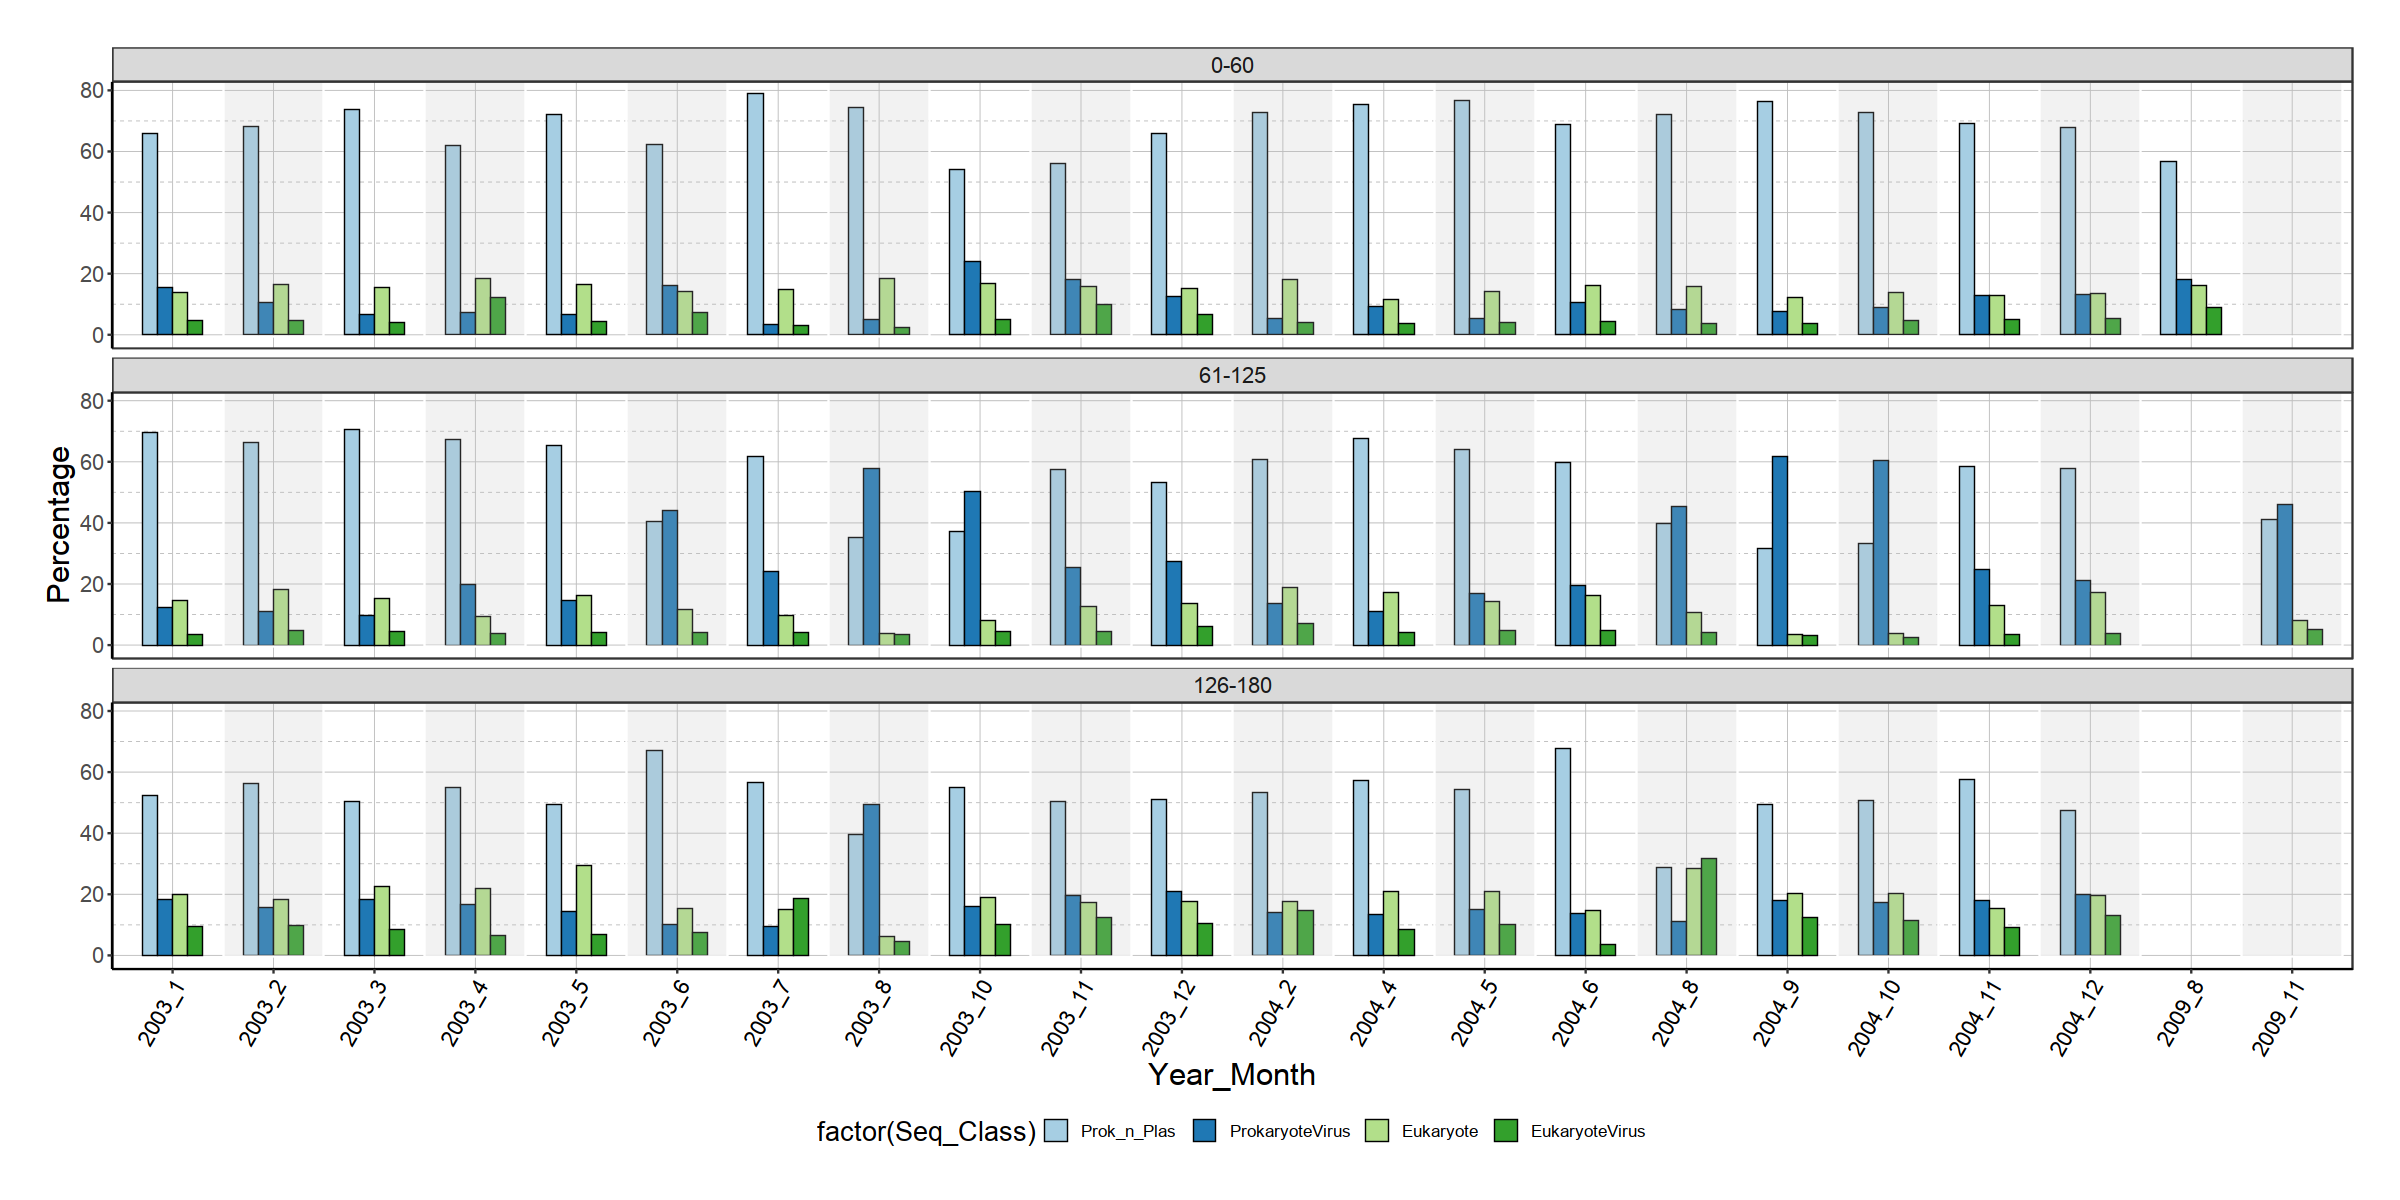

In [185]:
options(repr.plot.width=20, repr.plot.height=10)

p_hot <- ggplot() + 
  geom_bar(data=HOT_pct_meta_df.long, mapping=aes(x=Year_Month, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3) + 
  geom_rect(data=rects_11, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~DepthRange, nrow = 4) + 
  scale_fill_brewer(palette="Paired") + my_theme1 + 
  theme(axis.text.x=element_text(angle=60,vjust=1))

p_hot

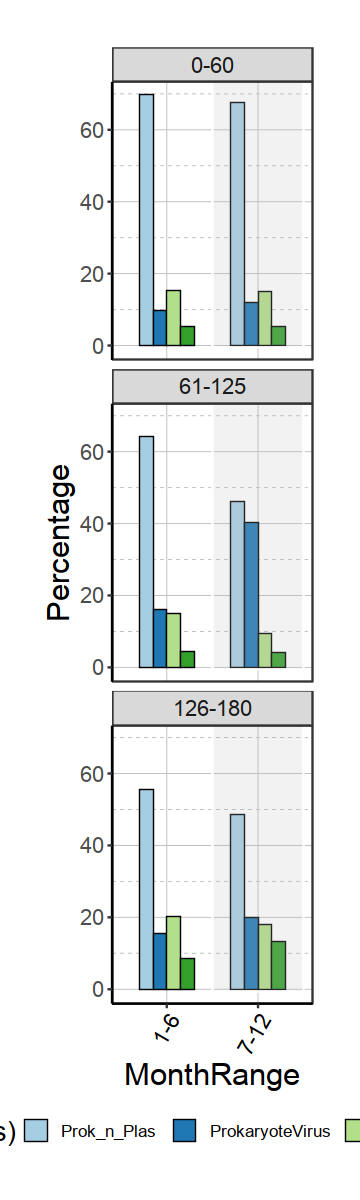

In [133]:
options(repr.plot.width=3, repr.plot.height=10)

p_hot_2 <- ggplot() + 
  geom_bar(data=HOT_pct_meta_df.long, mapping=aes(x=MonthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3) + 
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~DepthRange, nrow = 4) + 
  scale_fill_brewer(palette="Paired") + my_theme1 + 
  theme(axis.text.x=element_text(angle=60,vjust=1))

p_hot_2

In [141]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [145]:
HOT_pct_meta_df.long.se <- summarySE(HOT_pct_meta_df.long, measurevar="Percentage", groupvars=c("DepthRange","MonthRange", "Seq_Class"))
head(HOT_pct_meta_df.long.se)

,DepthRange,MonthRange,Seq_Class,N,Percentage,sd,se,ci
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0-60,1-6,Prok_n_Plas,12,69.819872,5.145890,1.4854904,3.269542
2,0-60,1-6,ProkaryoteVirus,12,9.672840,4.160659,1.2010788,2.643557
3,0-60,1-6,Eukaryote,12,15.288070,2.001700,0.5778409,1.271819
4,0-60,1-6,EukaryoteVirus,12,5.219218,2.405842,0.6945067,1.528599
5,0-60,7-12,Prok_n_Plas,11,67.675004,8.600074,2.5930198,5.777608
6,0-60,7-12,ProkaryoteVirus,11,12.036946,6.224745,1.8768311,4.181840


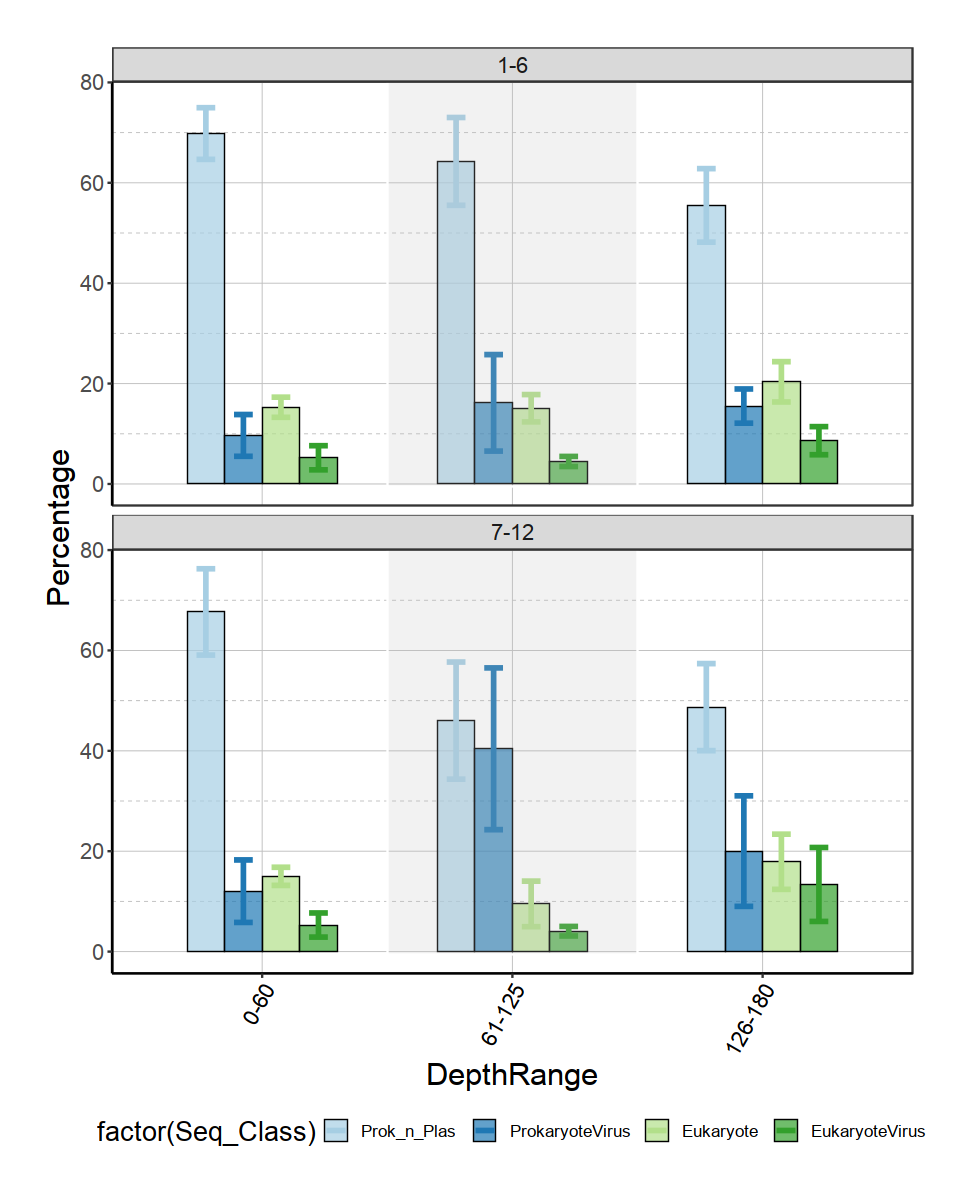

In [170]:
options(repr.plot.width=8, repr.plot.height=10)

p_hot_2 <- ggplot(data=HOT_pct_meta_df.long.se) +
  geom_bar(mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3, alpha=0.7) + 
  geom_errorbar(aes(x=DepthRange, ymin=Percentage-sd, ymax=Percentage+sd, color=factor(Seq_Class)), 
           position = position_dodge(width=.6), width=0.3, alpha=1, size=1.2) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~MonthRange, nrow = 4) + 
  scale_fill_brewer(palette="Paired") + scale_color_brewer(palette="Paired") +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))

p_hot_2

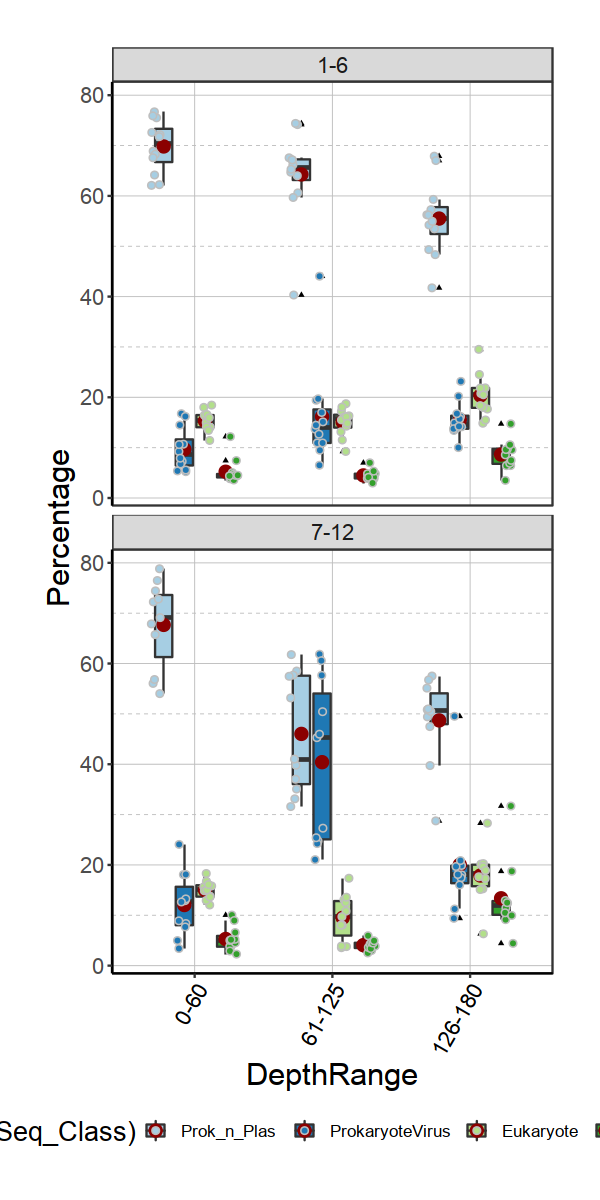

In [131]:
options(repr.plot.width=5, repr.plot.height=10)

ggplot(data=HOT_pct_meta_df.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class))) + 
  geom_boxplot(outlier.colour="black", outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  #stat_summary(fun=mean, colour="darkred", geom="point", shape=18, size=3) + 
  stat_summary(fun=mean, geom="point",colour="darkred", size=3, position = position_dodge(width=.6)) +
  geom_point(pch = 21, position = position_jitterdodge(0.2), color="gray") +
#facet_wrap(~DepthRange, nrow = 3) + 
  scale_fill_brewer(palette="Paired") + my_theme1 + 
  theme(axis.text.x=element_text(angle=60,vjust=1)) + facet_wrap(~MonthRange, nrow = 2)


In [78]:
# unique(BATS_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_2', '2003_3', '2003_4', '2003_5', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12',
  '2004_1', '2004_2', '2004_3', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_7', '2009_11')

BATS_pct_meta_df.long <- BATS_pct_meta_df %>% 
  mutate(MonthRange = case_when(Collection_Month>=1 & Collection_Month<=6 ~ "1-6",
                                Collection_Month>=7 & Collection_Month<=12 ~ "7-12")) %>% 
  mutate(MonthRange = factor(MonthRange, levels=c("1-6", "7-12"))) %>% 
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
#  select(Collection_Year, Month_Name, Depth, Year_Month, Eukaryote, EukaryoteVirus, Plasmid, Prokaryote, ProkaryoteVirus) %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  select(Collection_Year, MonthRange, Month_Name, Depth, Year_Month, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>%
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=c("0-60", "61-125", "126-180"))) %>%
#  mutate(Seq_Class = factor(Seq_Class, levels=c("Prokaryote", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus", "Plasmid"))) 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

#  mutate_if(is.integer, as.character) %>% 
#  group_by(Month_Name, Seq_Class, Depth) %>% 
#  summarise(Mean=mean(Percentage), SD=sd(Percentage)) 

head(BATS_pct_meta_df.long, 2)

,Collection_Year,MonthRange,Month_Name,Depth,Year_Month,Seq_Class,Percentage,DepthRange
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,2003,1-6,April,10,2003_4,Eukaryote,10.95256,0-60
2,2003,1-6,April,80,2003_4,Eukaryote,28.66428,61-125


In [79]:
sort(unique(BATS_pct_meta_df.long$Depth))

[1]   1  10  40  60  80 100 120 160 180

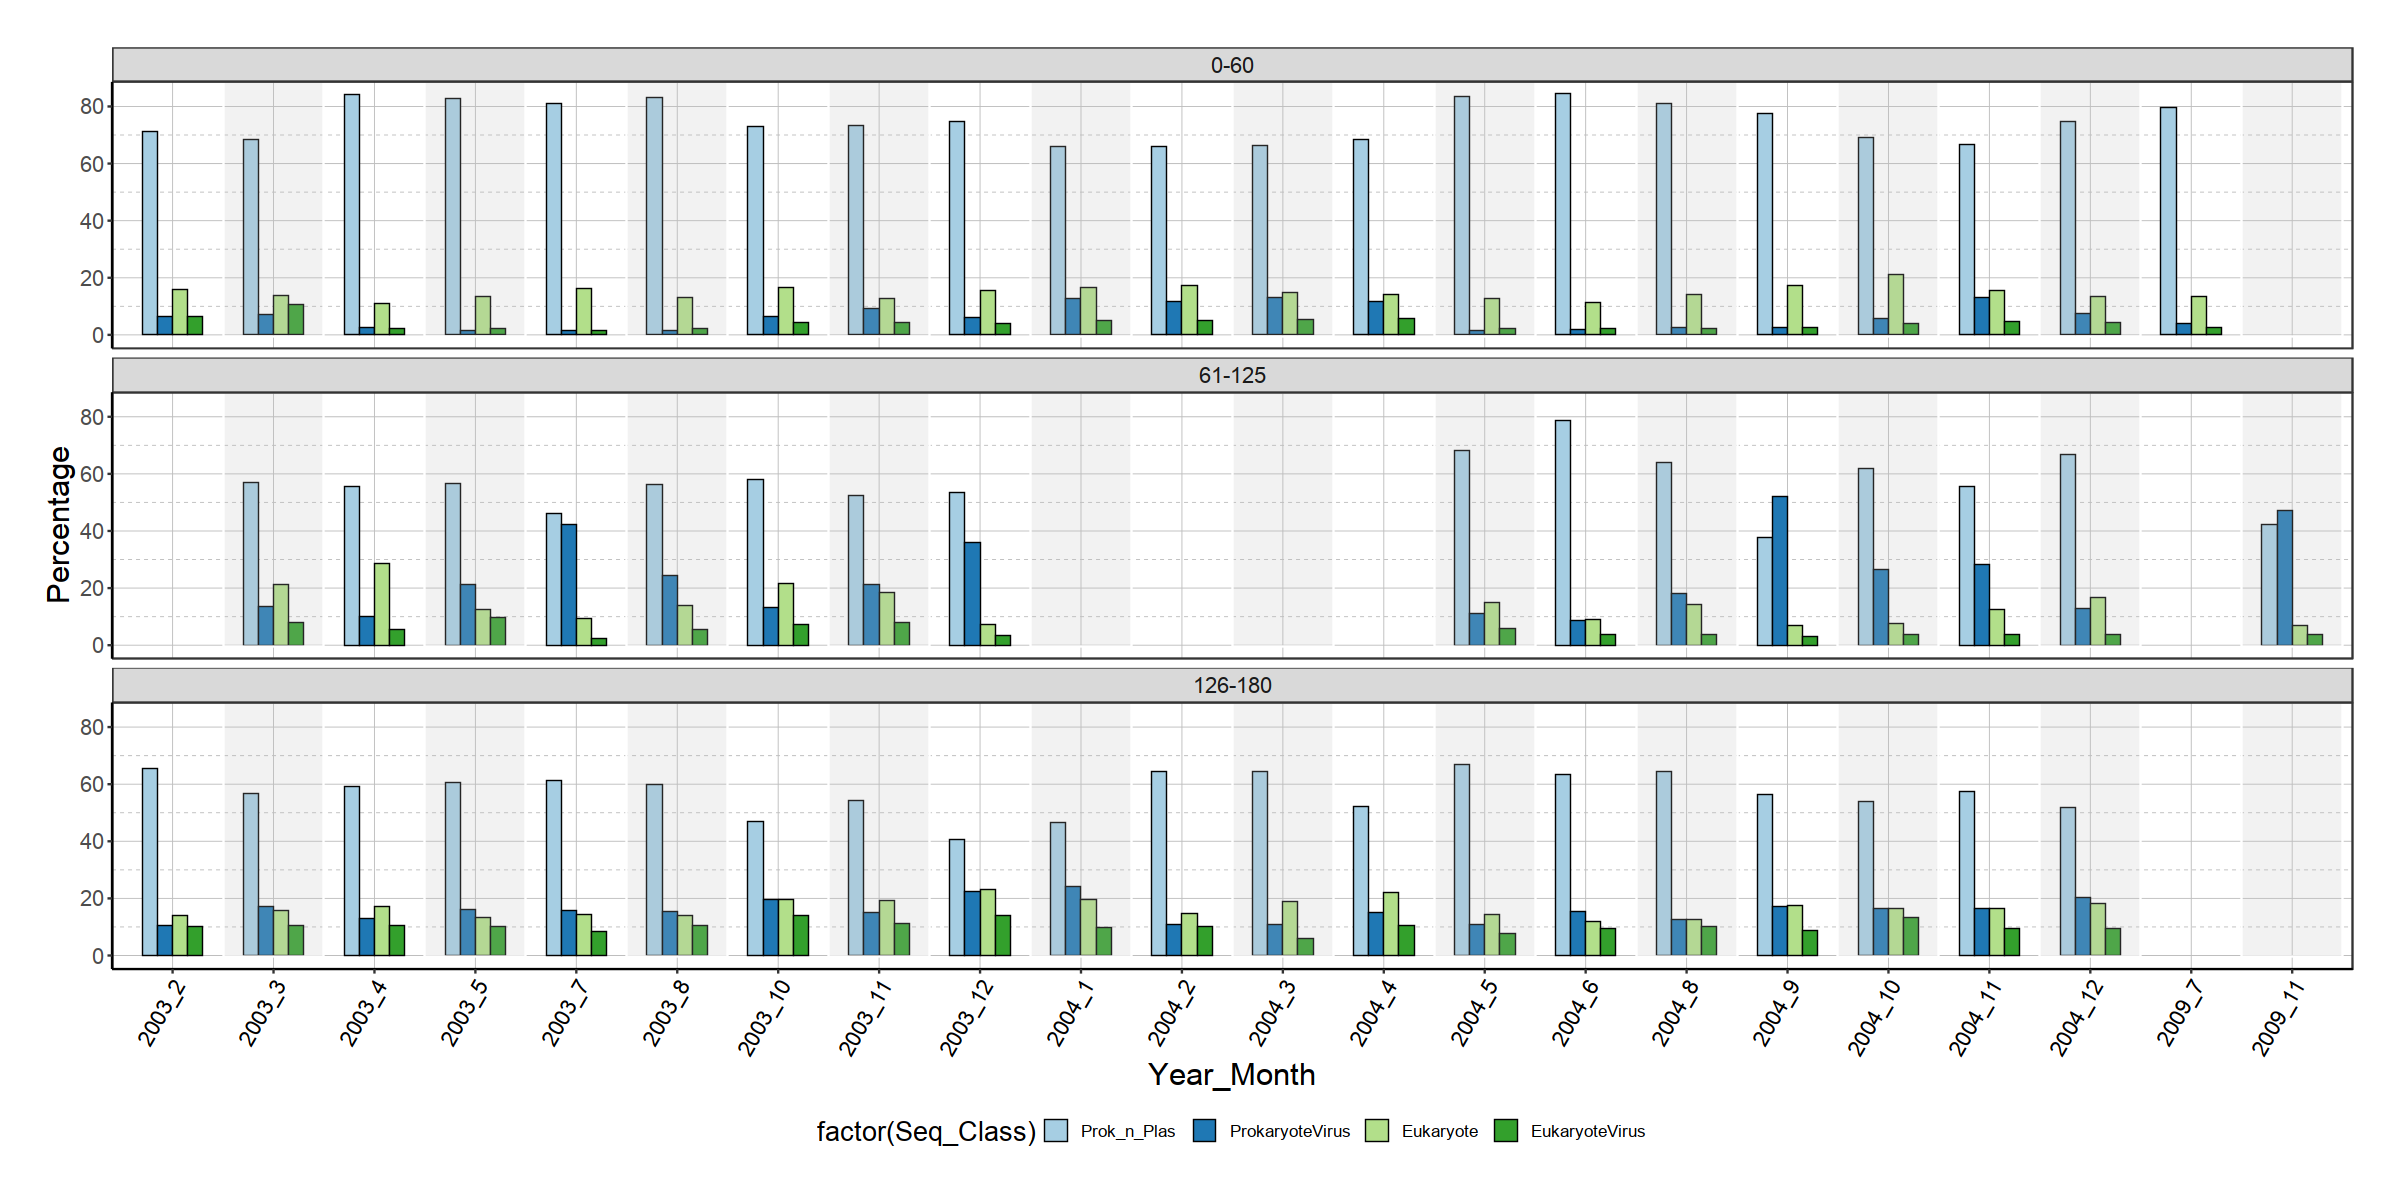

In [80]:
options(repr.plot.width=20, repr.plot.height=10)

p_bats <- ggplot() + 
  geom_bar(data=BATS_pct_meta_df.long, mapping=aes(x=Year_Month, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3) + 
  geom_rect(data=rects, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), color="white", fill="grey", alpha = 0.2) +
  facet_wrap(~DepthRange, nrow = 4) + 
  scale_fill_brewer(palette="Paired") + my_theme1 + 
  theme(axis.text.x=element_text(angle=60,vjust=1))

p_bats

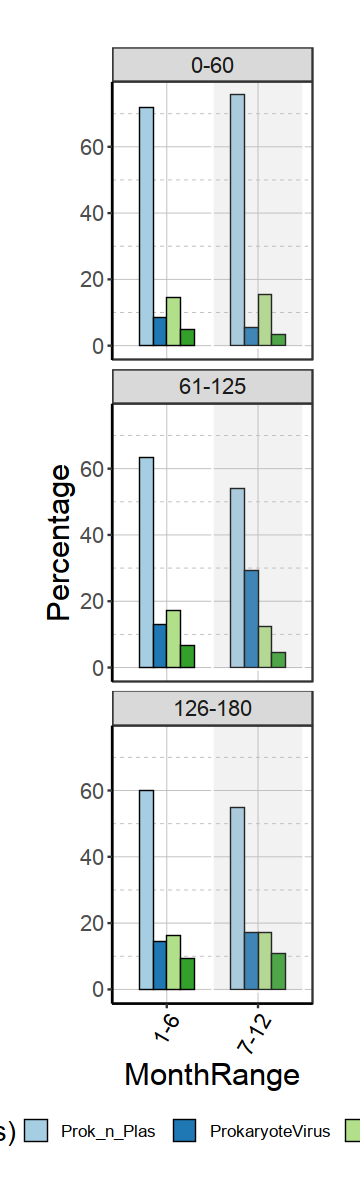

In [90]:
options(repr.plot.width=3, repr.plot.height=10)

p_bats_2 <- ggplot() + 
  geom_bar(data=BATS_pct_meta_df.long, mapping=aes(x=MonthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3) + 
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~DepthRange, nrow = 4) + 
  scale_fill_brewer(palette="Paired") + my_theme1 + 
  theme(axis.text.x=element_text(angle=60,vjust=1))

p_bats_2

In [171]:
BATS_pct_meta_df.long.se <- summarySE(BATS_pct_meta_df.long, measurevar="Percentage", groupvars=c("DepthRange","MonthRange", "Seq_Class"))
head(BATS_pct_meta_df.long.se)

,DepthRange,MonthRange,Seq_Class,N,Percentage,sd,se,ci
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0-60,1-6,Prok_n_Plas,15,71.921414,7.616141,1.9664790,4.217678
2,0-60,1-6,ProkaryoteVirus,15,8.444444,4.705922,1.2150638,2.606053
3,0-60,1-6,Eukaryote,15,14.658346,2.044595,0.5279122,1.132259
4,0-60,1-6,EukaryoteVirus,15,4.975796,2.389469,0.6169581,1.323244
5,0-60,7-12,Prok_n_Plas,11,75.777927,5.177150,1.5609695,3.478057
6,0-60,7-12,ProkaryoteVirus,11,5.525241,3.575858,1.0781619,2.402294


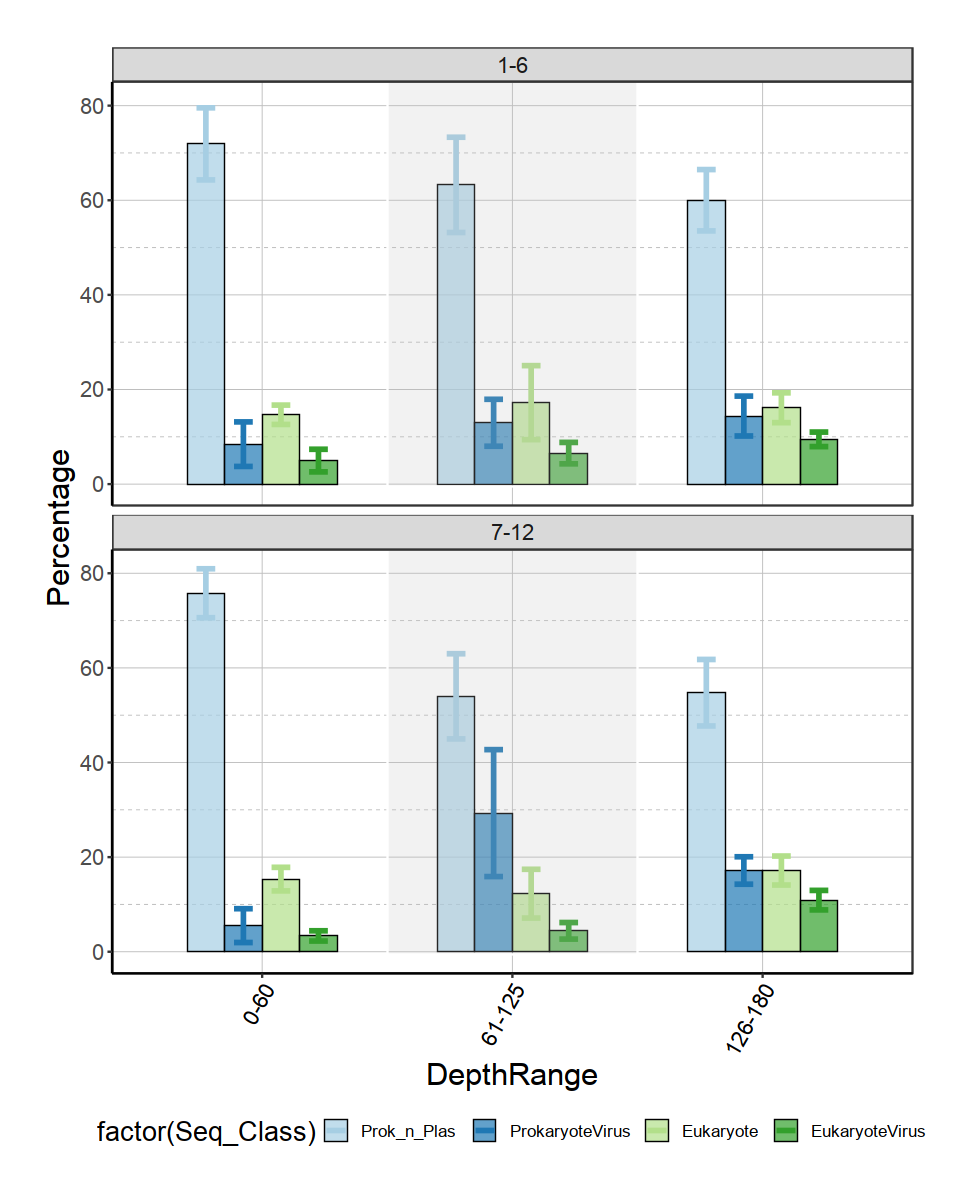

In [172]:
options(repr.plot.width=8, repr.plot.height=10)

p_bats_2 <- ggplot(data=BATS_pct_meta_df.long.se) +
  geom_bar(mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3, alpha=0.7) + 
  geom_errorbar(aes(x=DepthRange, ymin=Percentage-sd, ymax=Percentage+sd, color=factor(Seq_Class)), 
           position = position_dodge(width=.6), width=0.3, alpha=1, size=1.2) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~MonthRange, nrow = 4) + 
  scale_fill_brewer(palette="Paired") + scale_color_brewer(palette="Paired") +
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))

p_bats_2

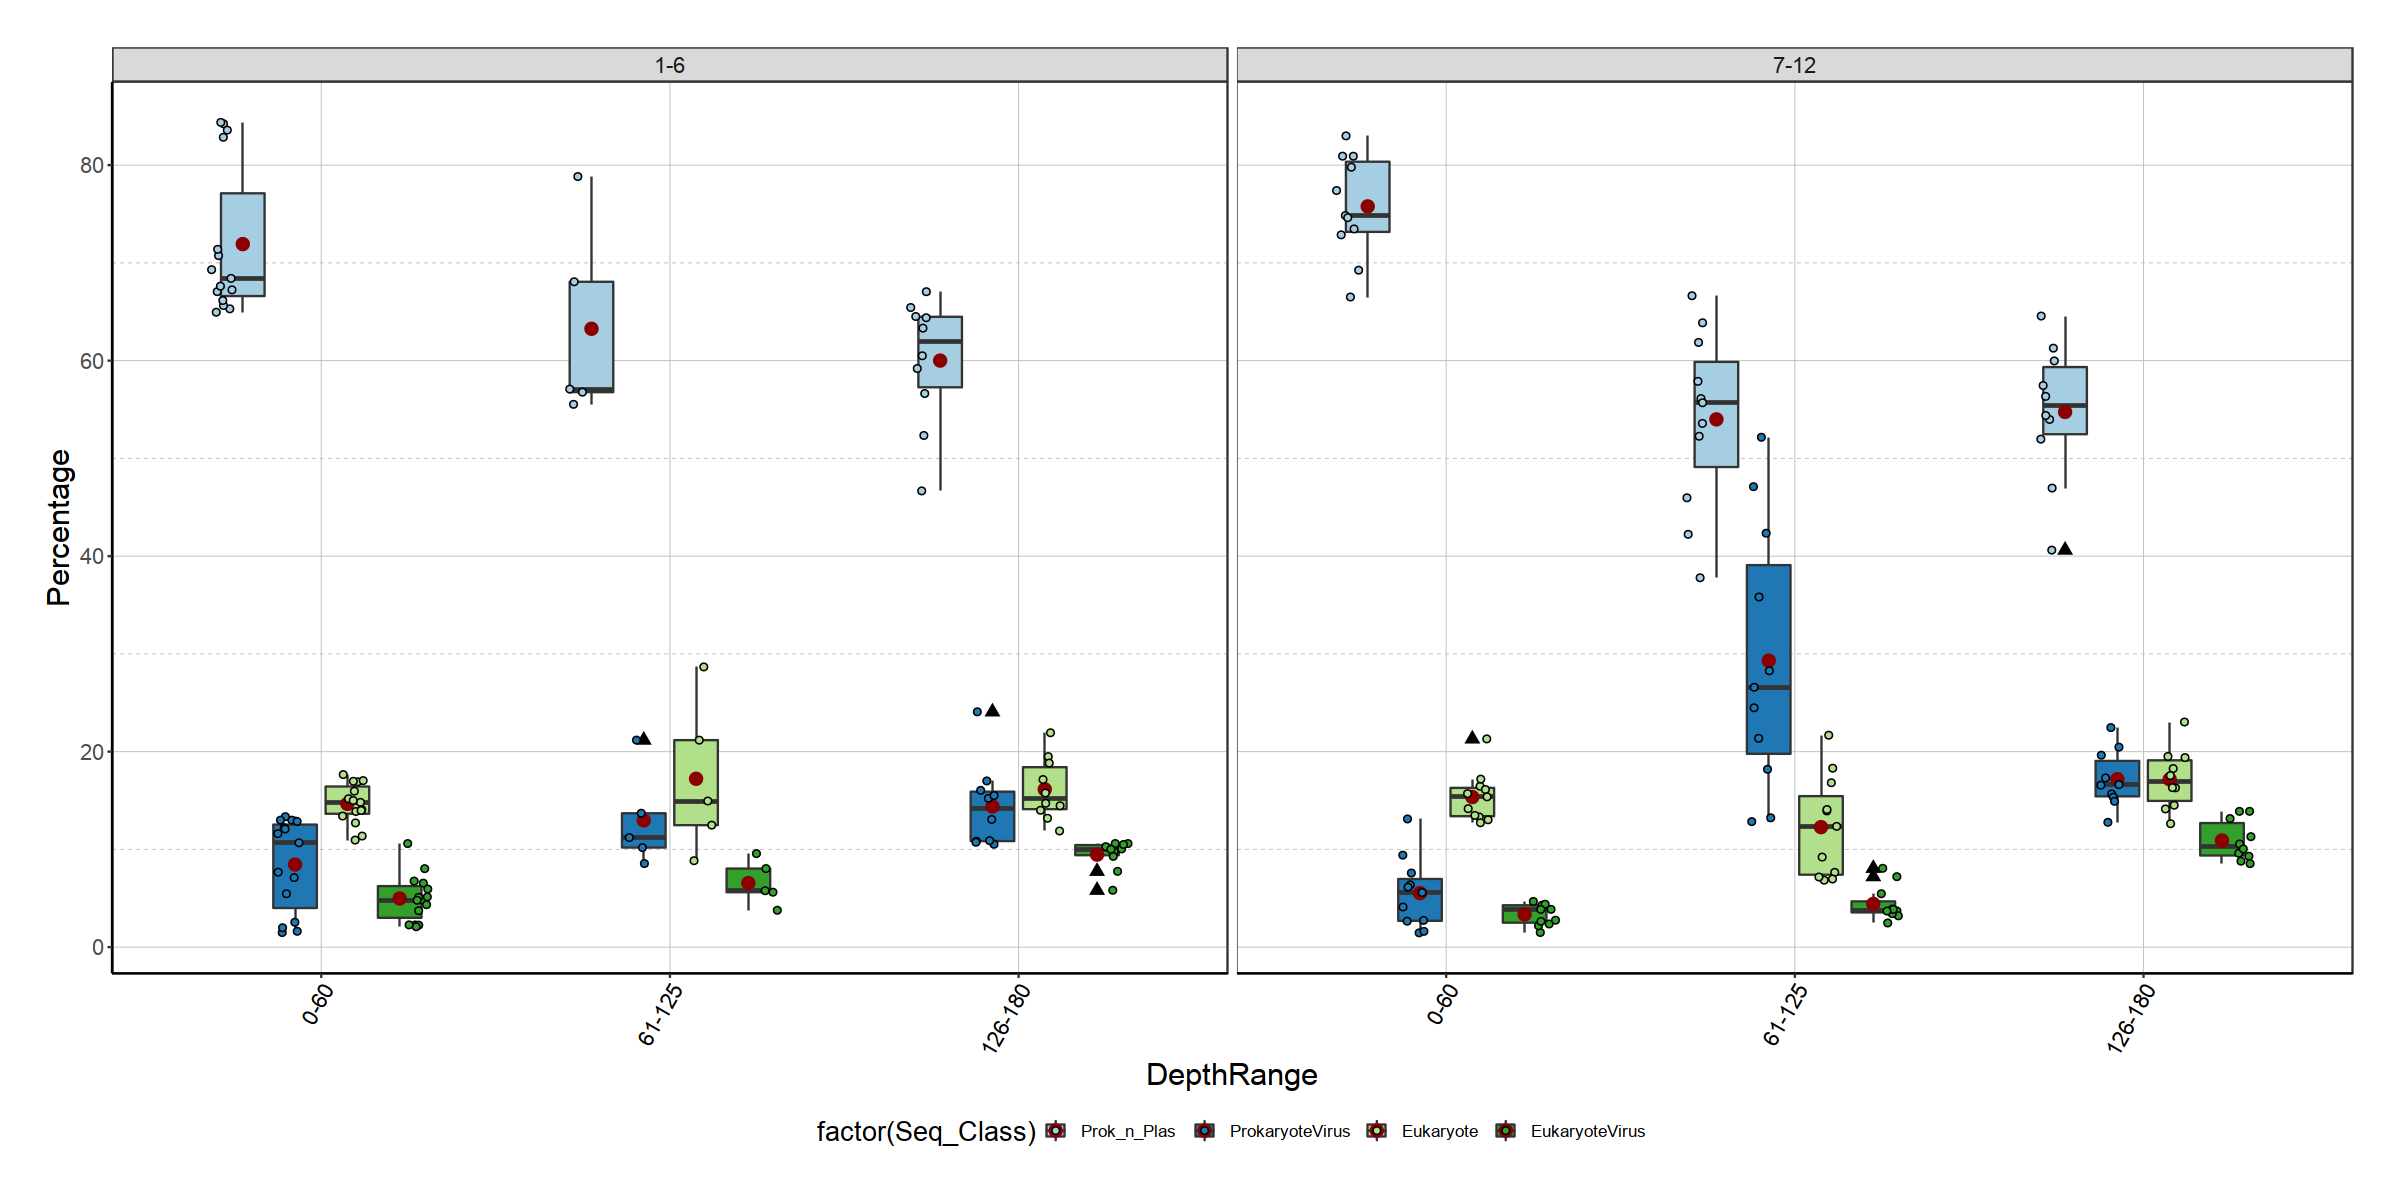

In [81]:
ggplot(data=BATS_pct_meta_df.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class))) + 
  geom_boxplot(outlier.colour="black", outlier.shape=17, outlier.size=3, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  #stat_summary(fun=mean, colour="darkred", geom="point", shape=18, size=3) + 
  stat_summary(fun=mean, geom="point",colour="darkred", size=3, position = position_dodge(width=.6)) +
  geom_point(pch = 21, position = position_jitterdodge(0.2)) +
#facet_wrap(~DepthRange, nrow = 3) + 
  scale_fill_brewer(palette="Paired") + my_theme1 + 
  theme(axis.text.x=element_text(angle=60,vjust=1))  + facet_wrap(~MonthRange, nrow = 1)

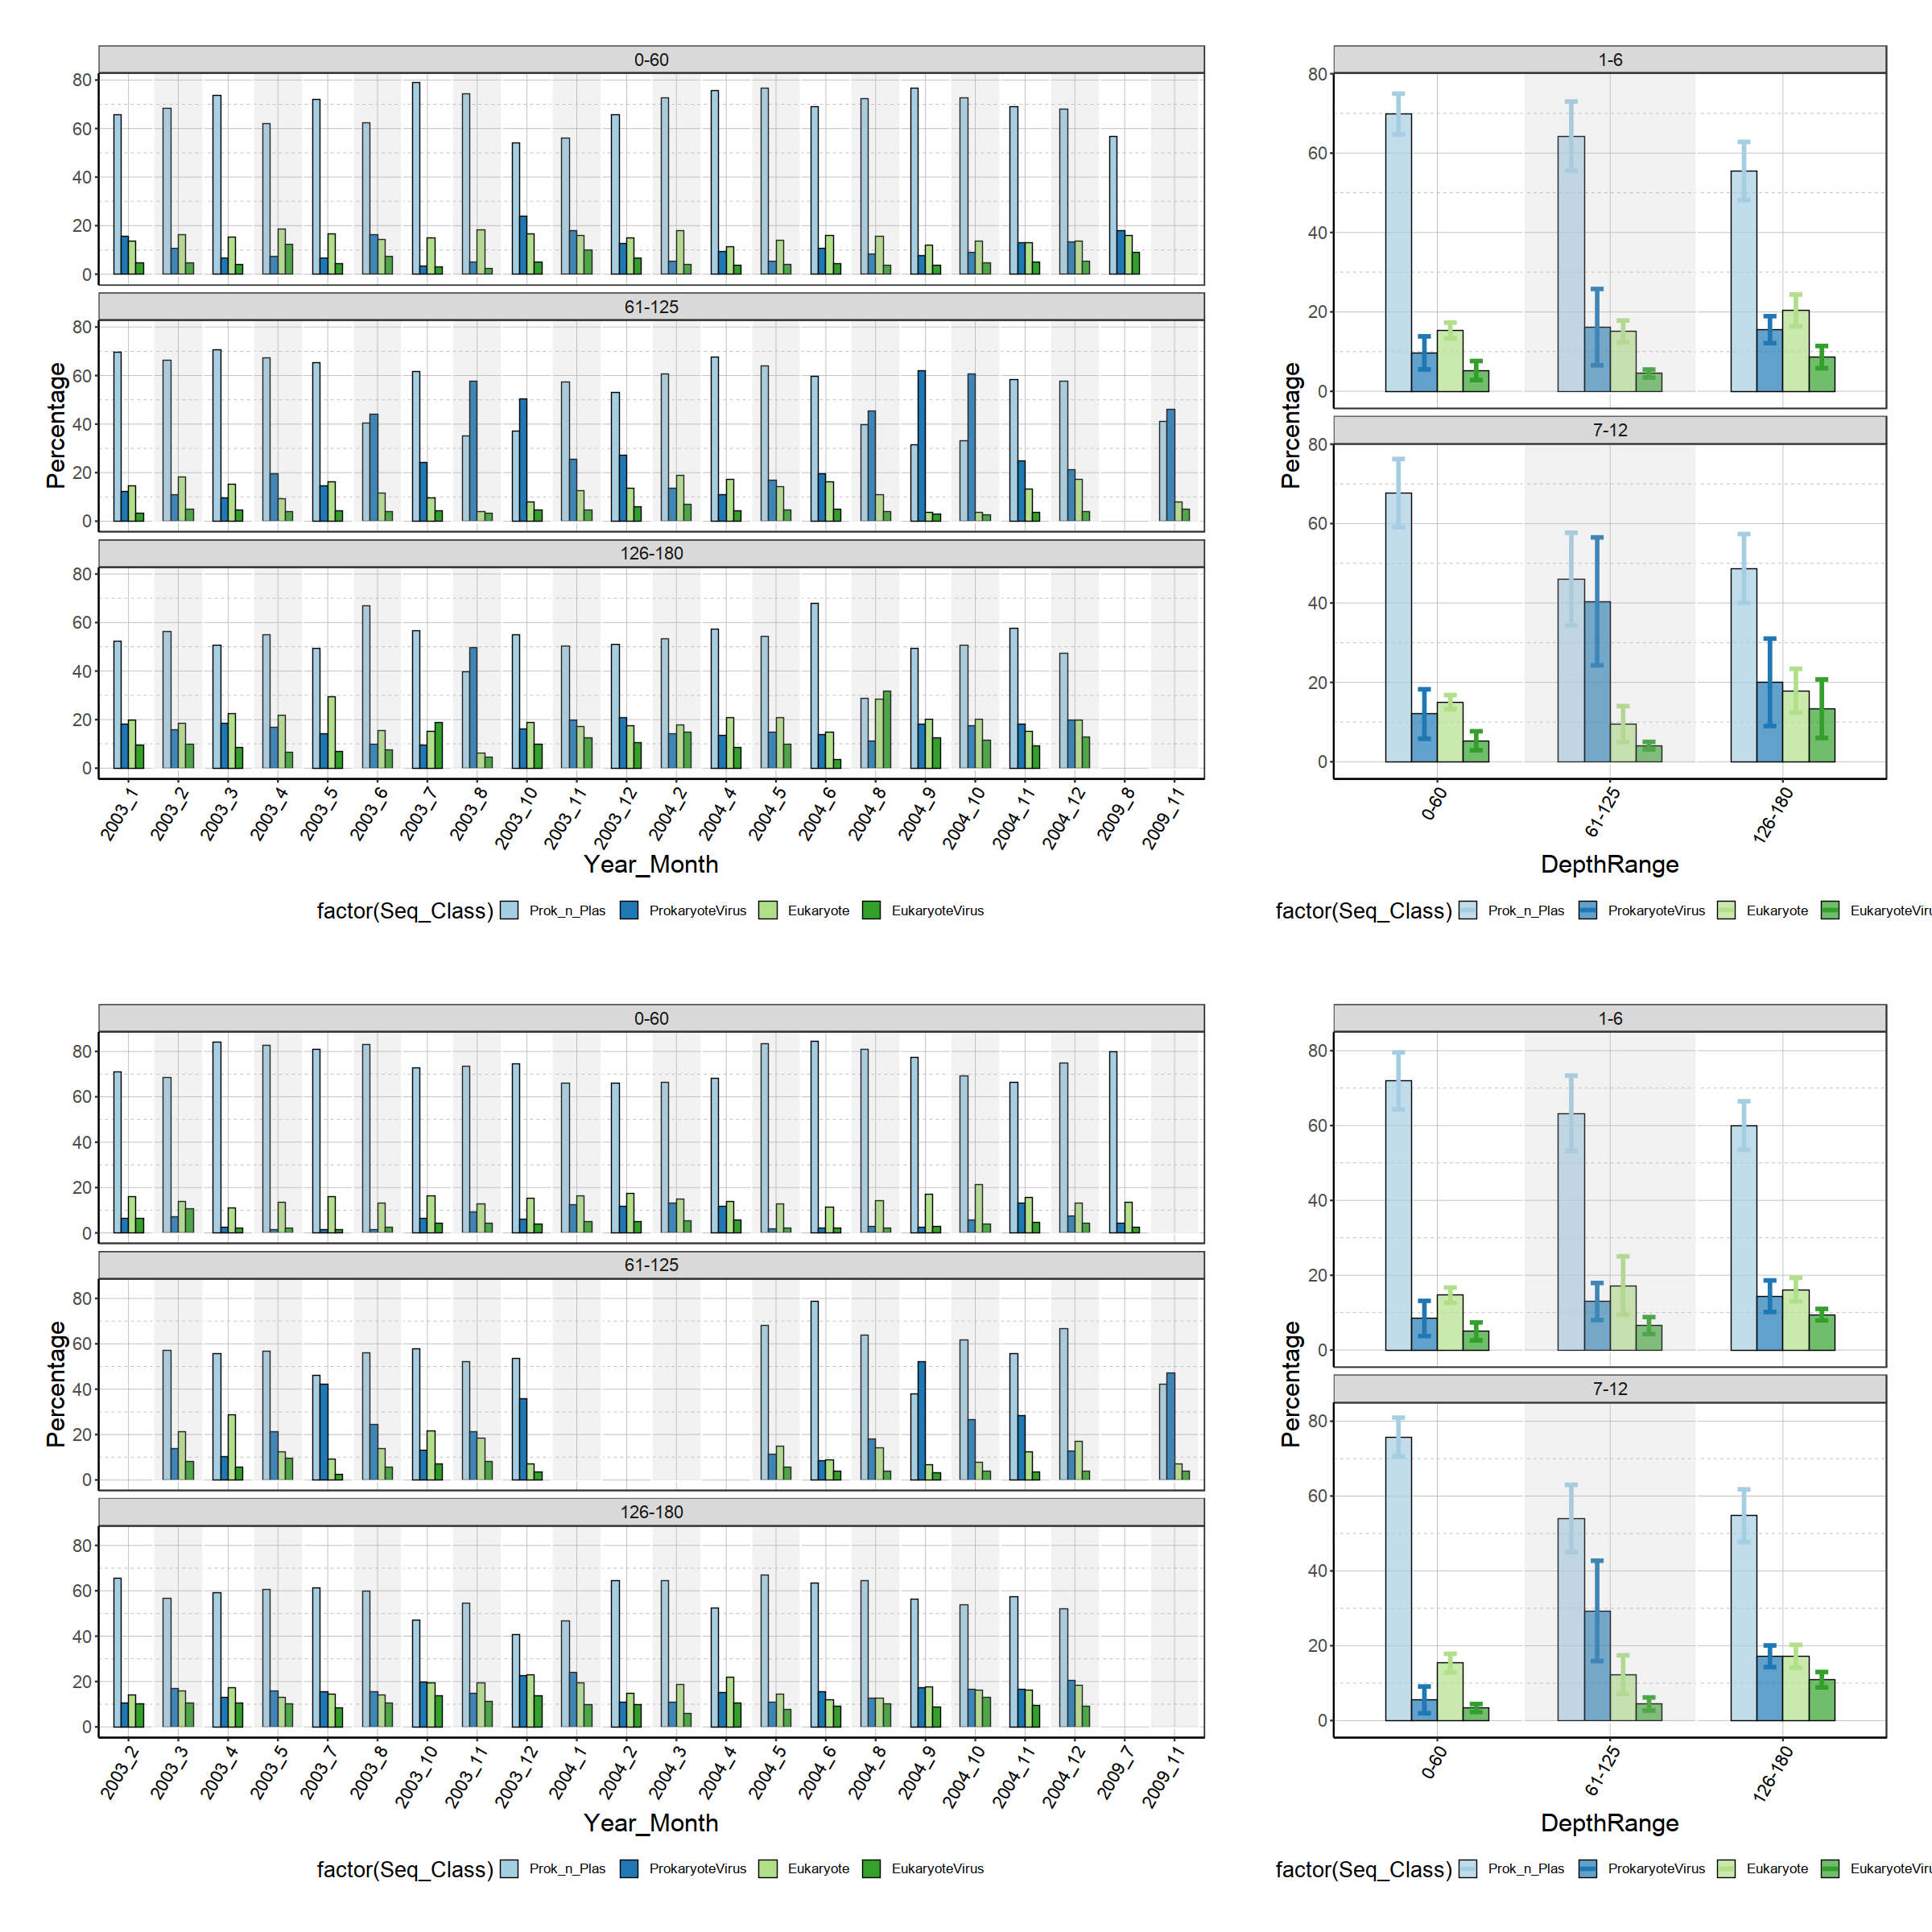

In [182]:
options(repr.plot.width=20, repr.plot.height=20)

library(patchwork)
p_merge <- (p_hot + p_hot_2 + p_bats + p_bats_2) + plot_layout(widths = c(2, 1))
p_merge

In [183]:
ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_barplot.pdf", 
       plot = last_plot(), path="./", 
       scale = 1, width = 400, height = 400, units = "mm",
       dpi = 300, limitsize = FALSE)